In [ ]:
wind_power = 10.0
wind_idx = np_random.integers(-9999, 9999)
wind_mag = (
    math.tanh(
        math.sin(0.02 * wind_idx)
        + (math.sin(math.pi * 0.01 * wind_idx))
    )
    * wind_power
)
wind_idx += 1

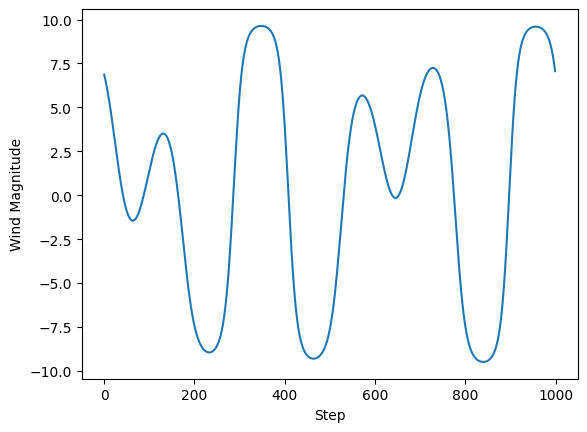

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

# parameters
wind_power = 10.0
steps = 1000

# random generator
np_random = np.random.default_rng(0)
# initial index
wind_idx = 50  # np_random.integers(-9999, 9999)
# storage
wind_values = []
# generate wind signal
for _ in range(steps):
    wind_mag = (
        math.tanh(
            math.sin(0.02 * wind_idx)
            + math.cos(math.pi * 0.01 * wind_idx)
        )
        * wind_power
    )
    wind_values.append(wind_mag)
    wind_idx += 1

# plot
plt.figure()
plt.plot(wind_values)
plt.xlabel("Step")
plt.ylabel("Wind Magnitude")
plt.show()

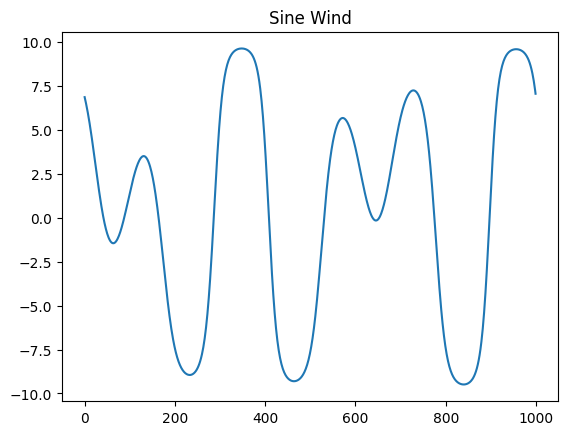

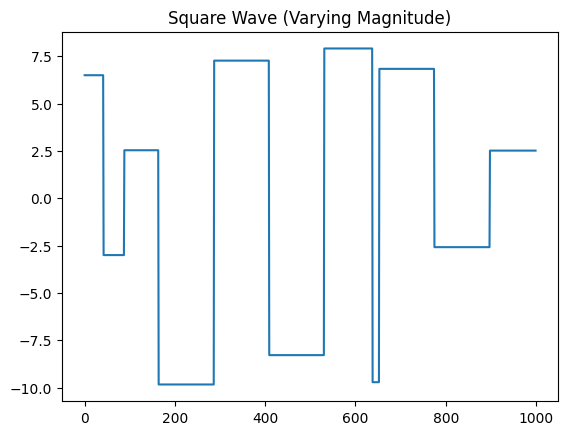

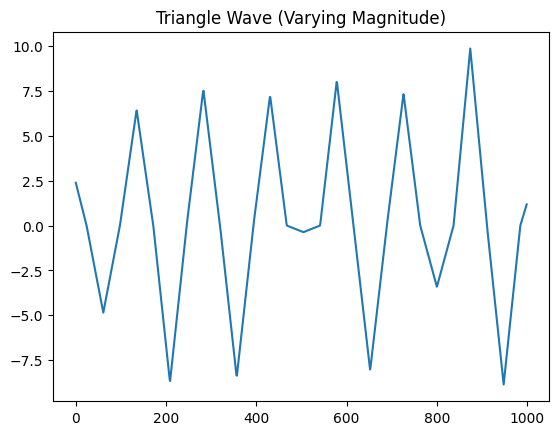

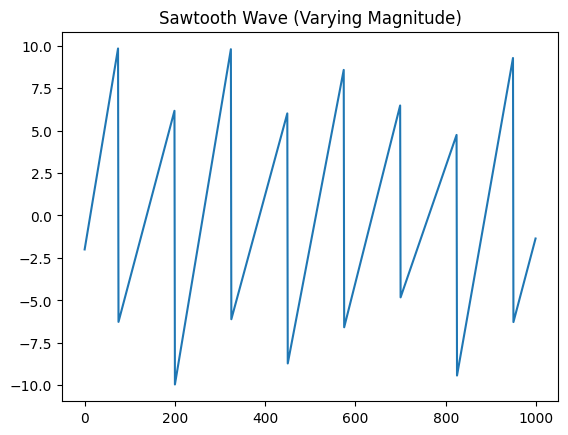

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import math

wind_power = 10.0
steps = 1000
init_wind_idx = 50.0

envelope = []
wind_idx = init_wind_idx
for _ in range(steps):
    wind_mag = (
        math.tanh(
            math.sin(0.02 * wind_idx)
            + math.cos(math.pi * 0.01 * wind_idx)
        )
        * wind_power
    )
    envelope.append(wind_mag)
    wind_idx += 1

# Regular
# square_base = np.sign(np.sin(0.0125 * wind_idx))
# Irregular
# amp = math.tanh(
#     math.sin(0.02 * wind_idx)
#     + math.cos(math.pi * 0.01 * wind_idx)
# )
# square_base = np.sign(amp)
square_wind = []
wind_idx = init_wind_idx
last_sign = 0
current_peak_mag = wind_power
for i in range(steps):
    raw_signal = math.tanh(
        math.sin(0.02 * wind_idx)
        + math.cos(math.pi * 0.01 * wind_idx)
    )
    current_sign = np.sign(raw_signal) # Returns -1 or 1
    if current_sign != last_sign:
        # Yes! The wind just switched. 
        # Roll a NEW random strength for this specific gust.
        # Example: Random strength between 50% (0.5) and 100% (1.0) of max power
        random_variation = np.random.uniform(0.1, 1.0)
        current_peak_mag = wind_power * random_variation
        # Update tracker
        last_sign = current_sign
    square_mag = current_sign * current_peak_mag
    square_wind.append(square_mag)
    wind_idx += 1


triangular_wind = []
wind_idx = init_wind_idx
last_sign = 0
current_peak_mag = wind_power
for i in range(steps):
    theta = 0.0425 * wind_idx
    raw_triangle = (2 / math.pi) * math.asin(math.sin(theta))
    current_sign = np.sign(raw_triangle)
    if current_sign != last_sign and current_sign != 0:
        # Pick a new random height for this slope
        current_peak_mag = wind_power * np.random.uniform(0.0, 1.0)
        last_sign = current_sign
    triangular_mag = raw_triangle * current_peak_mag
    triangular_wind.append(triangular_mag)
    wind_idx += 1

saw_wind = []
wind_idx = init_wind_idx
period = 125 # How long one gust lasts
last_raw = 0
current_peak_mag = wind_power
for i in range(steps):
    raw_saw = (wind_idx % period) / period
    bipolar_saw = (raw_saw * 2) - 1
    if raw_saw < last_raw:
        # The wave just dropped. Pick a new height for the next ramp.
        current_peak_mag = wind_power * np.random.uniform(0.3, 1.0)
    last_raw = raw_saw
    saw_mag = bipolar_saw * current_peak_mag
    saw_wind.append(saw_mag)
    wind_idx += 1


# plots
plt.figure()
plt.plot(envelope)
plt.title("Sine Wind")
plt.show()

plt.figure()
plt.plot(square_wind)
plt.title("Square Wave (Varying Magnitude)")
plt.show()

plt.figure()
plt.plot(triangular_wind)
plt.title("Triangle Wave (Varying Magnitude)")
plt.show()

plt.figure()
plt.plot(saw_wind)
plt.title("Sawtooth Wave (Varying Magnitude)")
plt.show()


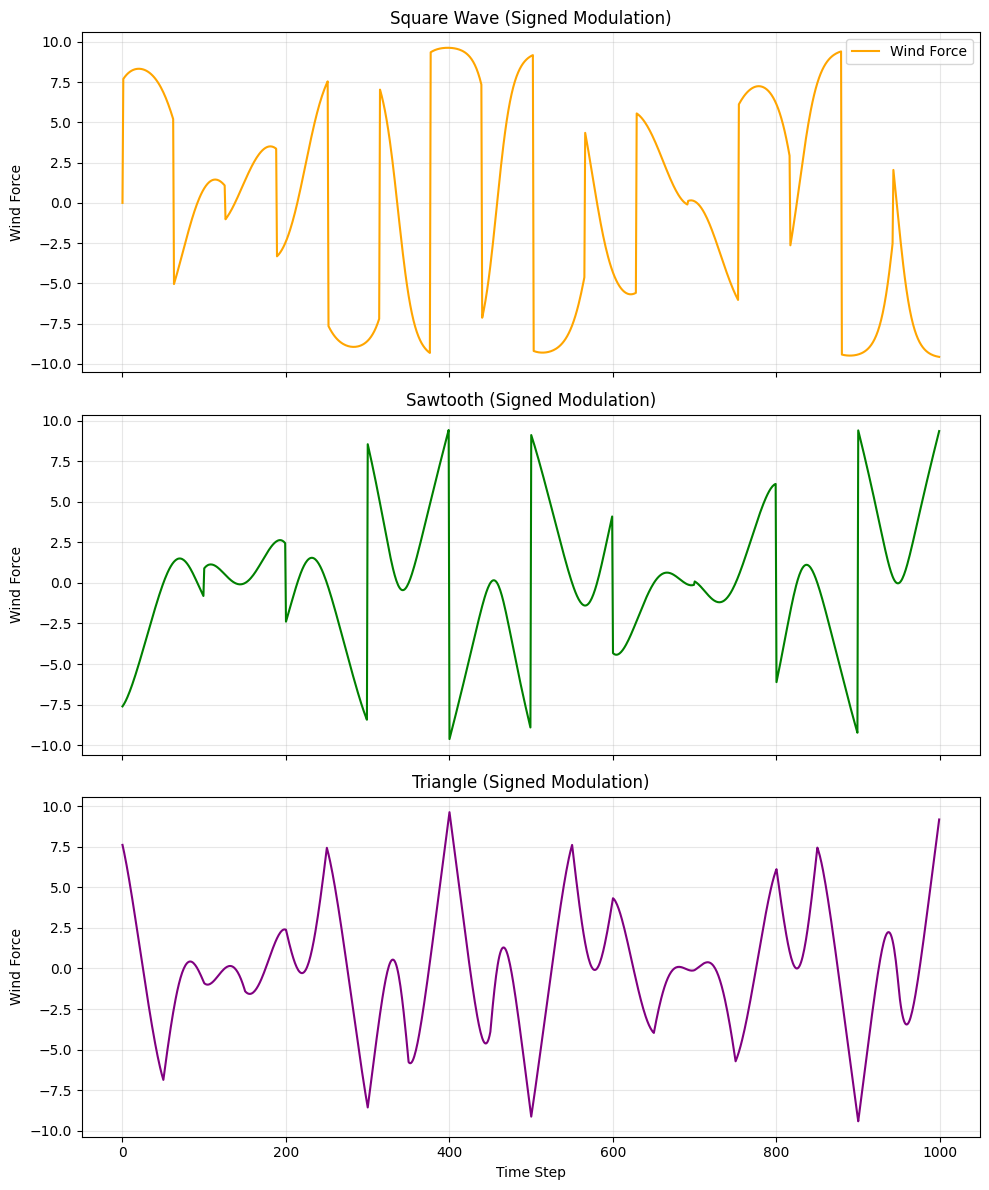

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
steps = 1000
wind_power = 10.0
t = np.arange(steps)

# ---------------------------------------------------------
# 1. THE SIGNED CHAOTIC ENVELOPE
# ---------------------------------------------------------
# We DO NOT use np.abs() here. 
# This allows the envelope itself to drift between -1.0 and +1.0.
# This means sometimes the envelope effectively "inverses" your wave.
envelope = np.tanh(np.sin(0.02 * t) + np.cos(np.pi * 0.01 * t))

# ---------------------------------------------------------
# 2. SQUARE WAVE (Signed Modulation)
# ---------------------------------------------------------
# The base square wave switches strictly between -1 and 1
square_base = np.sign(np.sin(0.05 * t))
# Multiplying by the signed envelope means the height varies 
# AND the direction can occasionally flip if the chaos crosses zero.
square_wind = square_base * envelope * wind_power

# ---------------------------------------------------------
# 3. SAWTOOTH WAVE (Signed Modulation)
# ---------------------------------------------------------
# Standard ramp from -1 to 1
period = 100 
saw_base = (t % period) / period * 2 - 1
saw_wind = saw_base * envelope * wind_power

# ---------------------------------------------------------
# 4. TRIANGLE WAVE (Signed Modulation)
# ---------------------------------------------------------
# Standard linear up/down from -1 to 1
tri_base = np.abs((t % period) / period * 4 - 2) - 1
triangle_wind = tri_base * envelope * wind_power

# ---------------------------------------------------------
# PLOTTING
# ---------------------------------------------------------
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Plot Square
axs[0].plot(t, square_wind, color='orange', label='Wind Force')
# Plot the envelope bounds to show it filling the full range
# axs[0].plot(t, envelope * wind_power, color='black', linestyle='--', alpha=0.3, label='Chaotic Envelope')
# axs[0].plot(t, -envelope * wind_power, color='black', linestyle='--', alpha=0.3) 
axs[0].set_title("Square Wave (Signed Modulation)")
axs[0].set_ylabel("Wind Force")
axs[0].legend(loc="upper right")
axs[0].grid(True, alpha=0.3)

# Plot Sawtooth
axs[1].plot(t, saw_wind, color='green')
# axs[1].plot(t, envelope * wind_power, color='black', linestyle='--', alpha=0.3)
# axs[1].plot(t, -envelope * wind_power, color='black', linestyle='--', alpha=0.3)
axs[1].set_title("Sawtooth (Signed Modulation)")
axs[1].set_ylabel("Wind Force")
axs[1].grid(True, alpha=0.3)

# Plot Triangle
axs[2].plot(t, triangle_wind, color='purple')
# axs[2].plot(t, envelope * wind_power, color='black', linestyle='--', alpha=0.3)
# axs[2].plot(t, -envelope * wind_power, color='black', linestyle='--', alpha=0.3)
axs[2].set_title("Triangle (Signed Modulation)")
axs[2].set_ylabel("Wind Force")
axs[2].set_xlabel("Time Step")
axs[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
class WindGenerator:
    def __init__(self, style_idx, period=125):
        self.style_idx = style_idx
        self.period = period
        
        # Internal state memory
        self.last_sign = 0
        self.current_peak_mag = None
        
        # Map indices to internal methods
        self.funcs = {
            0: self._sine,
            1: self._square,
            2: self._triangle,
            3: self._saw,
        }

    def get_magnitude(self, step_idx, power):
        # Initialize peak magnitude on first run if needed
        if self.current_peak_mag is None:
            self.current_peak_mag = power
            
        return self.funcs[self.style_idx](step_idx, power)

    def _sine(self, step_idx, power):
        # Sine doesn't really need state, but we keep the signature consistent
        return math.tanh(
            math.sin(0.02 * step_idx) + math.cos(math.pi * 0.01 * step_idx)
        ) * power

    def _square(self, step_idx, power):
        raw_signal = math.tanh(
            math.sin(0.02 * step_idx) + math.cos(math.pi * 0.01 * step_idx)
        )
        current_sign = np.sign(raw_signal)
        
        # State check: Did the sign flip?
        if current_sign != self.last_sign:
            random_variation = np.random.uniform(0.1, 1.0)
            self.current_peak_mag = power * random_variation
            self.last_sign = current_sign
            
        return current_sign * self.current_peak_mag

    def _triangle(self, step_idx, power):
        theta = 0.0425 * step_idx
        raw_triangle = (2 / math.pi) * math.asin(math.sin(theta))
        current_sign = np.sign(raw_triangle)
        
        # State check
        if current_sign != self.last_sign and current_sign != 0:
            self.current_peak_mag = power * np.random.uniform(0.1, 1.0)
            self.last_sign = current_sign
            
        return raw_triangle * self.current_peak_mag

    def _saw(self, step_idx, power):
        raw_saw = (step_idx % self.period) / self.period
        bipolar_saw = (raw_saw * 2) - 1
        
        # State check: Did the ramp reset? (current value < previous value)
        if raw_saw < self.last_sign:
            self.current_peak_mag = power * np.random.uniform(0.1, 1.0)
            
        self.last_sign = raw_saw
        return bipolar_saw * self.current_peak_mag


class CustomWindWrapper(gym.Wrapper):
    def __init__(self, env, enable_wind=None, fun_idx=0, wind_power=0.0, turbulence_power=0.0):
        """
        Args:
            env: The environment to wrap.
            wind_func: A function (step_idx, lander_body) -> (force_x, force_y).
            turbulence_func: A function (step_idx, lander_body) -> torque.
        """
        if 0.0 > wind_power or wind_power > 20.0:
            gym.logger.warn(
                f"wind_power value is recommended to be between 0.0 and 20.0, (current value: {wind_power})"
            )
        self.wind_power = wind_power
        if 0.0 > turbulence_power or turbulence_power > 2.0:
            gym.logger.warn(
                f"turbulence_power value is recommended to be between 0.0 and 2.0, (current value: {turbulence_power})"
            )
        self.turbulence_power = turbulence_power
        super().__init__(env)
        self.fun_idx = fun_idx
        self.enable_wind = enable_wind
        self.wind_idx = 0
        self.torque_idx = 0

        # We need access to the inner lander object
        # We use .unwrapped to ensure we get the base environment instance
        self.base_env = env.unwrapped

        # Generators will be initialized in reset()
        self.wind_gen = None
        self.turb_gen = None

    def reset(self, **kwargs):
        self.wind_gen = WindGenerator(self.fun_idx)
        self.turb_gen = WindGenerator(self.fun_idx)
        if self.enable_wind:  # Initialize wind pattern based on index
            self.wind_idx = self.base_env.np_random.integers(-9999, 9999)
            self.torque_idx = self.base_env.np_random.integers(-9999, 9999)
        return super().reset(**kwargs)

    def step(self, action):
        assert self.base_env.lander is not None
        # Update wind and apply to the lander
        assert self.base_env.lander is not None, "You forgot to call reset()"
        
        lander = self.base_env.lander
        legs = self.base_env.legs
        if self.enable_wind and not (legs[0].ground_contact or legs[1].ground_contact):
            wind_mag = self.wind_gen.get_magnitude(self.wind_idx, self.wind_power)
            self.wind_idx += 1
            lander.ApplyForceToCenter((wind_mag, 0.0), True)

            torque_mag = self.turb_gen.get_magnitude(self.torque_idx, self.turbulence_power)
            self.torque_idx += 1
            lander.ApplyTorque(torque_mag, True)

        # 4. Proceed with standard physics step
        return super().step(action)

In [ ]:
def make_custom_lander(wind_type=0, enable_wind=True, wind_power=10.0, turbulence_power=1.0):
    """
    Factory function to create the environment with your custom wrapper.
    """
    # 1. Create base env with internal wind DISABLED
    env = gym.make(
        "LunarLander-v3", 
        enable_wind=False
    )
    env = CustomWindWrapper(
        env,
        enable_wind=True,
        fun_idx=wind_type,
        wind_power=wind_power,
        turbulence_power=turbulence_power
    )
    return env

env = make_custom_lander(
    wind_type=1,         # e.g., 1 = Square Wave
    enable_wind=True,
    wind_power=5.0, 
    turbulence_power=1.0
)

test_env = make_custom_lander( 
    wind_type=3,         # Keep same wind type for consistent testing
    enable_wind=True,
    wind_power=10.0, 
    turbulence_power=2.0
)

# Fixing RNG for env
env.reset(seed=SEED)
test_env.reset(seed=SEED)

In [ ]:
"""
Classic cart-pole system implemented by Rich Sutton et al.
Copied from http://incompleteideas.net/sutton/book/code/pole.c
permalink: https://perma.cc/C9ZM-652R
"""

import math

import numpy as np

import gymnasium as gym
from gymnasium import logger, spaces
from gymnasium.envs.classic_control import utils
from gymnasium.error import DependencyNotInstalled
from gymnasium.vector import AutoresetMode, VectorEnv
from gymnasium.vector.utils import batch_space


class CartPoleEnv(gym.Env[np.ndarray, int | np.ndarray]):
    metadata = {
        "render_modes": ["human", "rgb_array"],
        "render_fps": 50,
    }

    def __init__(
        self, sutton_barto_reward: bool = False, render_mode: str | None = None
    ):
        self._sutton_barto_reward = sutton_barto_reward

        self.gravity = 9.8
        self.masscart = 1.0
        self.masspole = 0.1
        self.total_mass = self.masspole + self.masscart
        self.length = 1.25  # actually half the pole's length
        self.polemass_length = self.masspole * self.length
        self.force_mag = 10.0
        self.tau = 0.02  # seconds between state updates
        self.kinematics_integrator = "euler"

        # Angle at which to fail the episode
        self.theta_threshold_radians = 12 * 2 * math.pi / 360
        self.x_threshold = 2.4

        # Angle limit set to 2 * theta_threshold_radians so failing observation
        # is still within bounds.
        high = np.array(
            [
                self.x_threshold * 2,
                np.inf,
                self.theta_threshold_radians * 2,
                np.inf,
            ],
            dtype=np.float32,
        )

        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Box(-high, high, dtype=np.float32)

        self.render_mode = render_mode

        self.screen_width = 600
        self.screen_height = 400
        self.screen = None
        self.clock = None
        self.isopen = True
        self.state: np.ndarray | None = None

        self.steps_beyond_terminated = None

    def step(self, action):
        assert self.action_space.contains(action), (
            f"{action!r} ({type(action)}) invalid"
        )
        assert self.state is not None, "Call reset before using step method."
        x, x_dot, theta, theta_dot = self.state
        force = self.force_mag if action == 1 else -self.force_mag
        costheta = np.cos(theta)
        sintheta = np.sin(theta)

        # For the interested reader:
        # https://coneural.org/florian/papers/05_cart_pole.pdf
        temp = (
            force + self.polemass_length * np.square(theta_dot) * sintheta
        ) / self.total_mass
        thetaacc = (self.gravity * sintheta - costheta * temp) / (
            self.length
            * (4.0 / 3.0 - self.masspole * np.square(costheta) / self.total_mass)
        )
        xacc = temp - self.polemass_length * thetaacc * costheta / self.total_mass

        if self.kinematics_integrator == "euler":
            x = x + self.tau * x_dot
            x_dot = x_dot + self.tau * xacc
            theta = theta + self.tau * theta_dot
            theta_dot = theta_dot + self.tau * thetaacc
        else:  # semi-implicit euler
            x_dot = x_dot + self.tau * xacc
            x = x + self.tau * x_dot
            theta_dot = theta_dot + self.tau * thetaacc
            theta = theta + self.tau * theta_dot

        self.state = np.array((x, x_dot, theta, theta_dot), dtype=np.float64)

        terminated = bool(
            x < -self.x_threshold
            or x > self.x_threshold
            or theta < -self.theta_threshold_radians
            or theta > self.theta_threshold_radians
        )

        if not terminated:
            reward = 0.0 if self._sutton_barto_reward else 1.0
        elif self.steps_beyond_terminated is None:
            # Pole just fell!
            self.steps_beyond_terminated = 0

            reward = -1.0 if self._sutton_barto_reward else 1.0
        else:
            if self.steps_beyond_terminated == 0:
                logger.warn(
                    "You are calling 'step()' even though this environment has already returned terminated = True. "
                    "You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior."
                )
            self.steps_beyond_terminated += 1

            reward = -1.0 if self._sutton_barto_reward else 0.0

        if self.render_mode == "human":
            self.render()

        # truncation=False as the time limit is handled by the `TimeLimit` wrapper added during `make`
        return np.array(self.state, dtype=np.float32), reward, terminated, False, {}

    def reset(
        self,
        *,
        seed: int | None = None,
        options: dict | None = None,
    ):
        super().reset(seed=seed)
        # Note that if you use custom reset bounds, it may lead to out-of-bound
        # state/observations.
        low, high = utils.maybe_parse_reset_bounds(
            options,
            -0.05,
            0.05,  # default low
        )  # default high
        self.state = self.np_random.uniform(low=low, high=high, size=(4,))
        self.steps_beyond_terminated = None

        if self.render_mode == "human":
            self.render()
        return np.array(self.state, dtype=np.float32), {}

    def render(self):
        if self.render_mode is None:
            assert self.spec is not None
            gym.logger.warn(
                "You are calling render method without specifying any render mode. "
                "You can specify the render_mode at initialization, "
                f'e.g. gym.make("{self.spec.id}", render_mode="rgb_array")'
            )
            return

        try:
            import pygame
            from pygame import gfxdraw
        except ImportError as e:
            raise DependencyNotInstalled(
                'pygame is not installed, run `pip install "gymnasium[classic-control]"`'
            ) from e

        if self.screen is None:
            pygame.init()
            if self.render_mode == "human":
                pygame.display.init()
                self.screen = pygame.display.set_mode(
                    (self.screen_width, self.screen_height)
                )
            else:  # mode == "rgb_array"
                self.screen = pygame.Surface((self.screen_width, self.screen_height))
        if self.clock is None:
            self.clock = pygame.time.Clock()

        world_width = self.x_threshold * 2
        scale = self.screen_width / world_width
        polewidth = 10.0
        polelen = scale * (2 * self.length)
        cartwidth = 50.0
        cartheight = 30.0

        if self.state is None:
            return None

        x = self.state

        self.surf = pygame.Surface((self.screen_width, self.screen_height))
        self.surf.fill((255, 255, 255))

        l, r, t, b = -cartwidth / 2, cartwidth / 2, cartheight / 2, -cartheight / 2
        axleoffset = cartheight / 4.0
        cartx = x[0] * scale + self.screen_width / 2.0  # MIDDLE OF CART
        carty = 100  # TOP OF CART
        cart_coords = [(l, b), (l, t), (r, t), (r, b)]
        cart_coords = [(c[0] + cartx, c[1] + carty) for c in cart_coords]
        gfxdraw.aapolygon(self.surf, cart_coords, (0, 0, 0))
        gfxdraw.filled_polygon(self.surf, cart_coords, (0, 0, 0))

        l, r, t, b = (
            -polewidth / 2,
            polewidth / 2,
            polelen - polewidth / 2,
            -polewidth / 2,
        )

        pole_coords = []
        for coord in [(l, b), (l, t), (r, t), (r, b)]:
            coord = pygame.math.Vector2(coord).rotate_rad(-x[2])
            coord = (coord[0] + cartx, coord[1] + carty + axleoffset)
            pole_coords.append(coord)
        gfxdraw.aapolygon(self.surf, pole_coords, (202, 152, 101))
        gfxdraw.filled_polygon(self.surf, pole_coords, (202, 152, 101))

        gfxdraw.aacircle(
            self.surf,
            int(cartx),
            int(carty + axleoffset),
            int(polewidth / 2),
            (129, 132, 203),
        )
        gfxdraw.filled_circle(
            self.surf,
            int(cartx),
            int(carty + axleoffset),
            int(polewidth / 2),
            (129, 132, 203),
        )

        gfxdraw.hline(self.surf, 0, self.screen_width, carty, (0, 0, 0))

        self.surf = pygame.transform.flip(self.surf, False, True)
        self.screen.blit(self.surf, (0, 0))
        if self.render_mode == "human":
            pygame.event.pump()
            self.clock.tick(self.metadata["render_fps"])
            pygame.display.flip()

        elif self.render_mode == "rgb_array":
            return np.transpose(
                np.array(pygame.surfarray.pixels3d(self.screen)), axes=(1, 0, 2)
            )

    def close(self):
        if self.screen is not None:
            import pygame

            pygame.display.quit()
            pygame.quit()
            self.isopen = False

class CartPoleTestEnv(gym.Env[np.ndarray, int | np.ndarray]):
    metadata = {
        "render_modes": ["human", "rgb_array"],
        "render_fps": 50,
    }

    def __init__(
        self, sutton_barto_reward: bool = False, render_mode: str | None = None
    ):
        self._sutton_barto_reward = sutton_barto_reward

        self.masspole = 0.1  # -> 0.5(Test)
        self.length = 1.0  # -> 0.5(Default)
        self.force_mag = 5.0 # -> 10.0(Test)

        self.gravity = 9.8
        self.masscart = 1.0
        self.total_mass = self.masspole + self.masscart
        self.polemass_length = self.masspole * self.length
        self.tau = 0.02  # seconds between state updates
        self.kinematics_integrator = "euler"

        # Angle at which to fail the episode
        self.theta_threshold_radians = 12 * 2 * math.pi / 360
        self.x_threshold = 2.4

        # Angle limit set to 2 * theta_threshold_radians so failing observation
        # is still within bounds.
        high = np.array(
            [
                self.x_threshold * 2,
                np.inf,
                self.theta_threshold_radians * 2,
                np.inf,
            ],
            dtype=np.float32,
        )

        self.action_space = spaces.Discrete(2)
        self.observation_space = spaces.Box(-high, high, dtype=np.float32)

        self.render_mode = render_mode

        self.screen_width = 600
        self.screen_height = 400
        self.screen = None
        self.clock = None
        self.isopen = True
        self.state: np.ndarray | None = None

        self.steps_beyond_terminated = None

    def step(self, action):
        assert self.action_space.contains(action), (
            f"{action!r} ({type(action)}) invalid"
        )
        assert self.state is not None, "Call reset before using step method."
        x, x_dot, theta, theta_dot = self.state
        force = self.force_mag if action == 1 else -self.force_mag
        costheta = np.cos(theta)
        sintheta = np.sin(theta)

        # For the interested reader:
        # https://coneural.org/florian/papers/05_cart_pole.pdf
        temp = (
            force + self.polemass_length * np.square(theta_dot) * sintheta
        ) / self.total_mass
        thetaacc = (self.gravity * sintheta - costheta * temp) / (
            self.length
            * (4.0 / 3.0 - self.masspole * np.square(costheta) / self.total_mass)
        )
        xacc = temp - self.polemass_length * thetaacc * costheta / self.total_mass

        if self.kinematics_integrator == "euler":
            x = x + self.tau * x_dot
            x_dot = x_dot + self.tau * xacc
            theta = theta + self.tau * theta_dot
            theta_dot = theta_dot + self.tau * thetaacc
        else:  # semi-implicit euler
            x_dot = x_dot + self.tau * xacc
            x = x + self.tau * x_dot
            theta_dot = theta_dot + self.tau * thetaacc
            theta = theta + self.tau * theta_dot

        self.state = np.array((x, x_dot, theta, theta_dot), dtype=np.float64)

        terminated = bool(
            x < -self.x_threshold
            or x > self.x_threshold
            or theta < -self.theta_threshold_radians
            or theta > self.theta_threshold_radians
        )

        if not terminated:
            reward = 0.0 if self._sutton_barto_reward else 1.0
        elif self.steps_beyond_terminated is None:
            # Pole just fell!
            self.steps_beyond_terminated = 0

            reward = -1.0 if self._sutton_barto_reward else 1.0
        else:
            if self.steps_beyond_terminated == 0:
                logger.warn(
                    "You are calling 'step()' even though this environment has already returned terminated = True. "
                    "You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior."
                )
            self.steps_beyond_terminated += 1

            reward = -1.0 if self._sutton_barto_reward else 0.0

        if self.render_mode == "human":
            self.render()

        # truncation=False as the time limit is handled by the `TimeLimit` wrapper added during `make`
        return np.array(self.state, dtype=np.float32), reward, terminated, False, {}

    def reset(
        self,
        *,
        seed: int | None = None,
        options: dict | None = None,
    ):
        super().reset(seed=seed)
        # Note that if you use custom reset bounds, it may lead to out-of-bound
        # state/observations.
        low, high = utils.maybe_parse_reset_bounds(
            options,
            -0.05,
            0.05,  # default low
        )  # default high
        self.state = self.np_random.uniform(low=low, high=high, size=(4,))
        self.steps_beyond_terminated = None

        if self.render_mode == "human":
            self.render()
        return np.array(self.state, dtype=np.float32), {}

    def render(self):
        if self.render_mode is None:
            assert self.spec is not None
            gym.logger.warn(
                "You are calling render method without specifying any render mode. "
                "You can specify the render_mode at initialization, "
                f'e.g. gym.make("{self.spec.id}", render_mode="rgb_array")'
            )
            return

        try:
            import pygame
            from pygame import gfxdraw
        except ImportError as e:
            raise DependencyNotInstalled(
                'pygame is not installed, run `pip install "gymnasium[classic-control]"`'
            ) from e

        if self.screen is None:
            pygame.init()
            if self.render_mode == "human":
                pygame.display.init()
                self.screen = pygame.display.set_mode(
                    (self.screen_width, self.screen_height)
                )
            else:  # mode == "rgb_array"
                self.screen = pygame.Surface((self.screen_width, self.screen_height))
        if self.clock is None:
            self.clock = pygame.time.Clock()

        world_width = self.x_threshold * 2
        scale = self.screen_width / world_width
        polewidth = 10.0
        polelen = scale * (2 * self.length)
        cartwidth = 50.0
        cartheight = 30.0

        if self.state is None:
            return None

        x = self.state

        self.surf = pygame.Surface((self.screen_width, self.screen_height))
        self.surf.fill((255, 255, 255))

        l, r, t, b = -cartwidth / 2, cartwidth / 2, cartheight / 2, -cartheight / 2
        axleoffset = cartheight / 4.0
        cartx = x[0] * scale + self.screen_width / 2.0  # MIDDLE OF CART
        carty = 100  # TOP OF CART
        cart_coords = [(l, b), (l, t), (r, t), (r, b)]
        cart_coords = [(c[0] + cartx, c[1] + carty) for c in cart_coords]
        gfxdraw.aapolygon(self.surf, cart_coords, (0, 0, 0))
        gfxdraw.filled_polygon(self.surf, cart_coords, (0, 0, 0))

        l, r, t, b = (
            -polewidth / 2,
            polewidth / 2,
            polelen - polewidth / 2,
            -polewidth / 2,
        )

        pole_coords = []
        for coord in [(l, b), (l, t), (r, t), (r, b)]:
            coord = pygame.math.Vector2(coord).rotate_rad(-x[2])
            coord = (coord[0] + cartx, coord[1] + carty + axleoffset)
            pole_coords.append(coord)
        gfxdraw.aapolygon(self.surf, pole_coords, (202, 152, 101))
        gfxdraw.filled_polygon(self.surf, pole_coords, (202, 152, 101))

        gfxdraw.aacircle(
            self.surf,
            int(cartx),
            int(carty + axleoffset),
            int(polewidth / 2),
            (129, 132, 203),
        )
        gfxdraw.filled_circle(
            self.surf,
            int(cartx),
            int(carty + axleoffset),
            int(polewidth / 2),
            (129, 132, 203),
        )

        gfxdraw.hline(self.surf, 0, self.screen_width, carty, (0, 0, 0))

        self.surf = pygame.transform.flip(self.surf, False, True)
        self.screen.blit(self.surf, (0, 0))
        if self.render_mode == "human":
            pygame.event.pump()
            self.clock.tick(self.metadata["render_fps"])
            pygame.display.flip()

        elif self.render_mode == "rgb_array":
            return np.transpose(
                np.array(pygame.surfarray.pixels3d(self.screen)), axes=(1, 0, 2)
            )

    def close(self):
        if self.screen is not None:
            import pygame

            pygame.display.quit()
            pygame.quit()
            self.isopen = False

In [ ]:
def evaluate_robustness_averaged(agent, env, base_length=0.05, max_length=2.5, steps=100, runs_per_point=5):
    """
    Sweeps pole lengths from base_length to max_length.
    Runs 'runs_per_point' episodes for each length.
    Returns means and standard deviations.
    """
    lengths = np.linspace(base_length, max_length, steps)
    means = []
    stds = []
    
    print(f"--- Starting Robustness Sweep ({runs_per_point} runs per point) ---")
    
    for l in lengths:
        episode_rewards = []
        
        for run in range(runs_per_point):
            # 1. Setup the OOD Environment
            # We use the TestEnv structure but override length specifically for the sweep
            env = CartPoleTestEnv() 
            env.length = l 
            # Note: We keep mass/force fixed to TestEnv defaults to isolate Length's impact
            # TestEnv Defaults: masspole=0.5, force=20.0
            
            # 2. Run Episode
            obs, _ = env.reset()
            total_reward = 0
            terminated = False
            truncated = False

            for t in range(max_t):
                action = agent.act(obs, eps=0.0)
                obs, r, terminated, truncated, _ = env.step(action)
                total_reward += r
                if (terminated or truncated): break
            
            episode_rewards.append(total_reward)
            env.close()
        
        # 3. Stats
        avg = np.mean(episode_rewards)
        std = np.std(episode_rewards)
        means.append(avg)
        stds.append(std)
        print(f"Length {l:.2f}: Mean Reward = {avg:.1f} +/- {std:.1f}")

    return lengths, np.array(means), np.array(stds)

# --- RUN IT ---
# Assuming 'model' is your trained DQN
# If you don't have the model loaded yet, comment out the agent line to test with random actions
lengths, means, stds = evaluate_robustness_averaged(agent, test_env)

# --- PLOT RESULTS ---
plt.figure(figsize=(10, 6))
plt.plot(lengths, means, label="Mean Reward", color="blue")
plt.fill_between(lengths, means - stds, means + stds, color="blue", alpha=0.2, label="Variance (Std Dev)")

# plt.axvline(x=0.5, color='green', linestyle='--', label="Training Env (Length=0.5)")
# plt.axvline(x=1.0, color='red', linestyle='--', label="Test Env (Length=1.0)")

plt.title("DQN Robustness: Zero-Shot Transfer Performance")
plt.xlabel("Pole Length (Meters)")
plt.ylabel("Average Reward (5 Runs)")
plt.legend()
plt.grid(True)
plt.show()